<a href="https://colab.research.google.com/github/Manasvi-Shahare/DBSCAN/blob/main/DBSCAN_Algorithm_Manasvi_Shahare_mshah107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DBSCAN Algorithm

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used in machine learning and data mining. It is an unsupervised machine learning algorithm which is designed to identify clusters of data points in a dataset based on the density of the points.

For DBSCAN, the most important parameters that need to be set are epsilon (ε) and MinPts. The parameters must be specified by the user.


Minimum samples (“MinPts”): represents the minimum number of points required in that neighborhood for a data point to be considered part of a cluster.

ε (epsilon or “eps”): represents the radius of a neighborhood around each data point.

In [ ]:
#Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn

In [ ]:
#Reading data from breast cancer wisconsin csv dataset
df = pd.read_csv('data.csv')

print('There are {} rows and {} columns in our dataset.'.format(df.shape[0],df.shape[1]))

There are 569 rows and 33 columns in our dataset.


### Inspecting the dataset

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Printing the count of benign(B) and malignant(M)
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Preprocessing the Dataset

In [ ]:
#Removing the unneccesary and null columns
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [ ]:
#Mapping Malignant to 1 and Benign to 0
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Feature scaling using StandardScaler function of the Scikit-Learn library
from sklearn.preprocessing import StandardScaler
X = df.drop('diagnosis',axis=1)
X = StandardScaler().fit_transform(X)

### Principal Component Analysis

Principal Component Analysis reduces the amount of variables while keeping the majority of the crucial data via principal component analysis. It transforms a number of variables that may be correlated into a smaller number of uncorrelated variables, known as principal components.

PCA's main goal is to reduce the number of features in your model to help you see patterns in your data and make your model run more quickly. By removing features with high correlation, PCA lowers the possibility of overfitting your model.

This code computes the number of principal components needed to explain at least 95% of the variance in the input data.

We need 10 principal components to explain more than 0.95 of the variance.

In [ ]:
#Extracting input column values
column_values = X.T

#Making Covariance Matrix
covariance_matrix = np.cov(column_values)

#Getting the EigenVectors and the EigenValues
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

#Calculate the percentage of variance explained by each eigenvalue
exp_variance = np.around((eigen_values / np.sum(eigen_values) * 100), 3)

#Calculate the cumulative explained variance
cumulative_exp_variance = np.cumsum(exp_variance)

#Find the index of the first value in cumulative_exp_variance that exceeds 95
n_components = np.argmax(cumulative_exp_variance >= 95)

#Print the results
for i in range(n_components + 1):
    print(' Principal Components: ', i, ', Explained Variance: ', cumulative_exp_variance[i])


 Principal Components:  0 , Explained Variance:  44.272
 Principal Components:  1 , Explained Variance:  63.242999999999995
 Principal Components:  2 , Explained Variance:  72.636
 Principal Components:  3 , Explained Variance:  79.238
 Principal Components:  4 , Explained Variance:  84.734
 Principal Components:  5 , Explained Variance:  88.759
 Principal Components:  6 , Explained Variance:  91.01
 Principal Components:  7 , Explained Variance:  92.599
 Principal Components:  8 , Explained Variance:  93.989
 Principal Components:  9 , Explained Variance:  95.158


As shown from the result above, we need atleast 10 components to explain 95% of the covariance. So I am taking 10 principal components to apply PCA.

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA using 10 components
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X)

### Elbow Method to Calculate the eps value used as a hyperparameter in DBSCAN algorithm

The DBSCAN algorithm uses the elbow method as a heuristic to get the ideal value for the eps parameter. For each data point in the dataset, the method comprises charting the distance to the closest k neighbors, where k is selected based on the characteristics of the data.

According to the elbow approach, the ideal value of eps can be discovered at the "elbow" of the resulting plot, which is the region of maximum curvature. At this point, increasing eps results in a significantly lower number of data points in each cluster, while decreasing eps results in a significant increase in the number of clusters.

Since, after applying PCA, we have reduced the dimensionality of our dataset to 10 features, I am using n_neighbors to be 20(2 * dimensions).

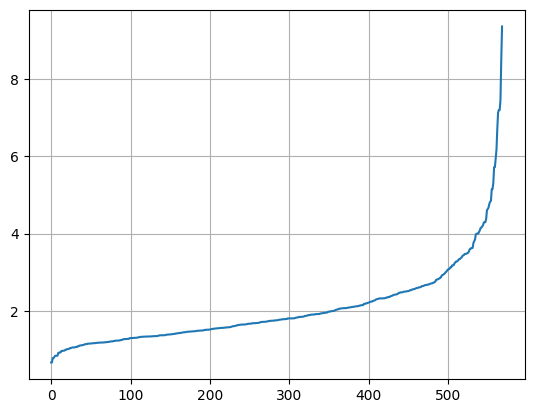

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

#Create NearestNeighbors object with n_neighbors = 20
nn = NearestNeighbors(n_neighbors=20)

#Fit the NearestNeighbors object to the PCA-transformed data
nn.fit(X_pca)

#Find the distances and indices of the 20 nearest neighbors for each data point
distances, indices = nn.kneighbors(X_pca)

#Calculate and plot the sorted distances to the 20th nearest neighbor for each data point
sorted_distances = np.sort(distances[:, 1])
plt.plot(sorted_distances)
plt.grid(True)


From the graph above, we can see that the elbow of the graph(region of maximum curvature) has a value around 4 . So, I am taking the eps value to be 4 .

### Implementation of DBSCAN Algo

The algorithm works by starting with an arbitrary data point and identifying all other points within epsilon distance of it. If there are min_samples or more points within that distance, the algorithm considers them to be part of a cluster and continues expanding the cluster by adding all directly-reachable points (i.e., those within epsilon distance) to the cluster.

If a point is not within epsilon distance of any other points, it is considered a noise point and is not assigned to any cluster. The algorithm continues iterating over the remaining data points until all have been assigned to a cluster or identified as noise.

One advantage of DBSCAN over other clustering algorithms is that it can identify clusters of arbitrary shape, unlike k-means which assumes clusters are spherical. However, it can be sensitive to the choice of parameters and can struggle with datasets of varying densities.

In [ ]:
from collections import deque
from scipy.spatial import KDTree

"""
A density-based clustering approach that produces clusters out of samples
when the number of neighbors within the radius defined by eps is greater
than the value of min samples.
"""
class DBSCAN:

    """ Constructor method for the DBSCAN class.
        Initializes the eps and min_points attributes of the class with the values passed as arguments.
        eps - the radius within which the points are regarded as neighbors
        min_points - the number of neighbors the sample needs for it to be considered as a core point
    """
    def __init__(self, eps, min_points):
        self.eps = eps
        self.min_points = min_points


    """ This method takes in the data as input and initializes following attributes of the class:
        self.labels_: A numpy array of zeros with the length of data.

        self.cluster_id_: An integer which starts at 0 and will be incremented for each new cluster

        self.tree_: A KDTree object created from data. Using a KDTree allows us to quickly find
        all the neighbors of a given point that lie within a radius of eps.

        self.core_points_: An empty list that will be used to store the indices of core points.

        self.non_core_points_: An empty list that will be used to store the indices of non-core points.

        self.order_: A numpy array of zeros with length equal to the number of data points in data.
        This will be used to keep track of the order in which points are visited during the clustering process.
    """
    def fit_predict(self, data):
        self.labels_ = np.zeros(len(data))
        self.cluster_id_ = 0
        self.tree_ = KDTree(data)
        self.core_points_ = []
        self.non_core_points_ = []
        self.order_ = np.zeros(len(data), dtype=int)

        # This for loop iterates through all the data points, checking
        # if the labels_ array has already been assigned a label for the current point index.
        # If it has, then it skips to the next iteration of the loop.

        for point_idx, point in enumerate(data):
            if self.labels_[point_idx] != 0:
                continue

            # If the current point has not been assigned a label, then the _get_neighbors method is called
            # with the current point as an argument to obtain a list of its neighbors.
            # If the number of neighbors is less than the min_points threshold,
            # then the current point is marked as noise by assigning a label of -1 to its index.

            neighbors = self._get_neighbors(point)
            if len(neighbors) < self.min_points:
                self.labels_[point_idx] = -1
                self.non_core_points_.append(point_idx)

            # Otherwise, a new cluster is formed with a unique ID = cluster_id, and
            # the _expand_cluster method is called to add all reachable neighbors to the cluster.
            else:
                self.cluster_id_ += 1
                self.labels_[point_idx] = self.cluster_id_
                self.core_points_.append(point_idx)
                self._expand_cluster(data, neighbors)

            self.order_[point_idx] = point_idx+1

        # returns the labels_ array with the assigned labels for each data point.
        return self.labels_, self.core_points_, self.non_core_points_, self.order_


    """ The _expand_cluster method is responsible for expanding the current cluster
        and adds all reachable neighbors to a cluster.
        It takes in two arguments,
        data - a dataset of points to be clustered
        neighbors - a list of indices of points that are neighbors of a core point.
    """
    def _expand_cluster(self, data, neighbors):

        #initializes a queue of the starting neighbors
        queue = deque(neighbors)

        # For each neighbor in the queue, the function removes it from queue,
        # and performs the following actions :

        # If the label of the neighbor is -1, it means that the point has not been assigned to any cluster yet,
        # so it is assigned to the current cluster.

        # If the label of the neighbor is 0, it means that the point has been visited before
        # but has not yet been assigned to any cluster.
        # In this case, the point is also assigned to the current cluster, and
        # checks whether the point is a core point by finding its neighbors using the _get_neighbors method.
        # If the point has at least min_points neighbors, it is added to the queue to be processed later.
        while queue:
            neighbor = queue.popleft()
            if self.labels_[neighbor] == -1:
                self.labels_[neighbor] = self.cluster_id_
            elif self.labels_[neighbor] == 0:
                self.labels_[neighbor] = self.cluster_id_
                new_neighbors = self._get_neighbors(data[neighbor])

                if len(new_neighbors) >= self.min_points:
                    for new_neighbor in new_neighbors:
                        if new_neighbor not in queue:
                            queue.append(new_neighbor)
                            self.core_points_.append(new_neighbor)

                else:
                    self.non_core_points_.append(neighbor)


    """ This method takes in a point as an argument and returns a list of indices of all the points in the dataset
        that are within the radius defined by self.eps from the point. query_ball_point is a method of the KDTree class.
        It takes in a point and a radius as arguments and
        returns a list of all the points within the given radius from the given point in the KDTree.
    """
    def _get_neighbors(self, point):
        return self.tree_.query_ball_point(point, self.eps)


    """ This method returns the labels_ attribute, which is an array of cluster labels for each point in the dataset.
    """
    def _get_labels(self):
        return self.labels_

The time complexity of my DBSCAN algorithm is O(n log n) due to the use of KDTree for efficient neighbor search. Specifically, the time complexity of the fit_predict method is O(n log n) since it loops through all data points and performs neighbor search for each point using KDTree. The _get_neighbors method also has a time complexity of O(log n) since it uses KDTree's query_ball_point method for neighbor search. The _expand_cluster method can take up to O(n) time in the worst case scenario when all points belong to a single cluster, and all points are reachable from the initial seed point, but this is not likely to occur in most practical scenarios. Therefore, the overall time complexity of my DBSCAN algorithm is O(n log n).

### Testing my Implementation

I am testing my DBSCAN implementation with eps value 4 that I got from the elbow method described above. And I am taking the min_points value to be 20 since our reduced dataset has 10 features, the min_points value is generally taken as 2*dimensions.

Sil Score:  0.4286909131506719
NMI Score:  0.03225519381549083


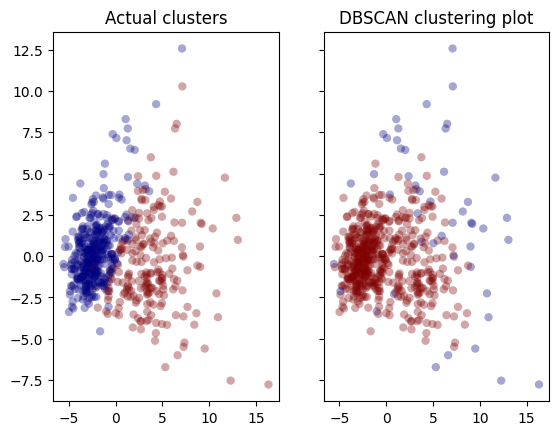

In [ ]:
from sklearn.metrics import silhouette_score, normalized_mutual_info_score

# Testing my DBSCAN implementation.
dbscan = DBSCAN(eps=4, min_points=20)
label, core_point, noncore_point, order = dbscan.fit_predict(X_pca)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(X_pca[:,0], X_pca[:,1], c=df["diagnosis"], cmap="jet", edgecolor="none", alpha=0.35)
ax1.set_title("Actual clusters")
ax2.scatter(X_pca[:,0], X_pca[:,1], c=label, cmap="jet", edgecolor="none", alpha=0.35)
ax2.set_title("DBSCAN clustering plot")

#printing the silhouette and nmi scores
sil_scores_list = silhouette_score(X_pca, label)
print("Sil Score: ", sil_scores_list)
nmi_scores_list = normalized_mutual_info_score(df["diagnosis"], label)
print("NMI Score: ", nmi_scores_list)

As we can see, with eps 4 and min_points 20, the silhouette score is 0.428 and the nmi score is 0.0322.

### Performance Evaluation

Since DBSCAN is an unsupervised algorithm, I am using two ways of evaluation: intrinsic evaluation using Silhouette Coefficient Score and extrinsic evaluation using Normalized Mutual Information(NMI) score. I have used both the methods from the Scikit-Learn library.

### Performing k Fold Cross Validation

K-fold cross-validation is a common technique for evaluating the performance of a clustering algorithm. The basic idea is to split the dataset into k equal-sized parts (or "folds"), and then use k-1 of the folds as training data and the remaining fold as test data. This process is repeated k times, with each fold used as the test data once. The results are then averaged across all k runs to obtain an estimate of the algorithm's performance.

To use k-fold cross-validation with NMI (Normalized Mutual Information), one would first split the dataset into k parts. Then, for each of the k runs, one part would be held out as the test data and the remaining k-1 parts would be used as training data to cluster the data. The NMI would then be calculated between the true labels of the test data and the predicted labels from the clustering algorithm. This process would be repeated k times, with each fold used as the test data once. The final NMI score would be the average of the NMI scores across all k runs.

To use k-fold cross-validation with the Silhouette Coefficient, the process is similar. The final Silhouette Coefficient score is the average of the scores across all k runs.

In [ ]:

from sklearn.model_selection import KFold
from sklearn.metrics import normalized_mutual_info_score, silhouette_score
import numpy as np

# Split data into k parts
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
data_splits = kf.split(X_pca)

# Initialize variables to store results
nmi_scores = []
silhouette_scores = []

# Loop over all combinations of k-1 folds as training data and remaining fold as validation data
for train_idx, valid_idx in data_splits:
    train_data = X_pca[train_idx]
    valid_data = X_pca[valid_idx]
    true_labels = (df["diagnosis"])[valid_idx]

    # Fit DBSCAN on training data and predict labels for validation data
    dbscan = DBSCAN(eps= 4 , min_points=20)
    train_labels, core_sample1, noncore_sample1, order1 = dbscan.fit_predict(train_data)
    valid_labels, core_sample2, noncore_sample2, order2 = dbscan.fit_predict(valid_data)

    # Calculate NMI and Silhouette Coefficient for predicted labels and true labels
    nmi_score = normalized_mutual_info_score(true_labels, valid_labels)
    if len(set(valid_labels)) > 1:
      sil_score = silhouette_score(valid_data, valid_labels)

    nmi_scores.append(nmi_score)
    silhouette_scores.append(sil_score)


# Average scores over all folds and combinations
mean_nmi_score = np.mean(nmi_scores)
mean_silhouette_score = np.mean(silhouette_scores)
std_silhouette = np.std(silhouette_scores)
std_nmi = np.std(nmi_scores)

print(f"Mean NMI score: {mean_nmi_score}")
print("Standard deviation of NMI score:", std_nmi)
print(f"Mean Silhouette Coefficient: {mean_silhouette_score}")
print("Standard deviation of silhouette score:", std_silhouette)



Mean NMI score: 0.27792252418096564
Standard deviation of NMI score: 0.053761017399989376
Mean Silhouette Coefficient: 0.29710418883311823
Standard deviation of silhouette score: 0.04477376047217591


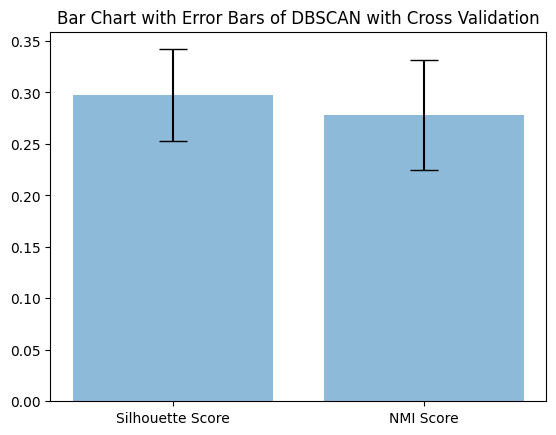

In [ ]:
fig, ax = plt.subplots()
x = ['Silhouette Score', 'NMI Score']
y = [mean_silhouette_score, mean_nmi_score]
err = [std_silhouette, std_nmi]
ax.bar(x, y, yerr=err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_title('Bar Chart with Error Bars of DBSCAN with Cross Validation')
plt.show()

### Implementing Randomization

DBSCAN algorithm uses a random point selection process to identify neighbors and build clusters. As a result, running DBSCAN multiple times with the same hyperparameters will produce slightly different results due to the randomness in the process.

Therefore, you can use the variations in the results produced by running DBSCAN multiple times as a way to estimate the uncertainty or error bars in the final clustering result. This can be done by running DBSCAN multiple times and computing statistics (e.g., mean, standard deviation) on the resulting cluster assignments for each point.

Bootstrap resampling is one way to do this. Bootstrap resampling is a method for estimating the uncertainty of a statistic by generating many resamples of the data and computing the statistic on each resample. We can use this method to estimate the uncertainty in the number of points assigned to each cluster by DBSCAN.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, normalized_mutual_info_score


# Initialize the DBSCAN object
dbs = DBSCAN(eps= 4 , min_points=20)

# Run DBSCAN on the data
labels, core_sample, noncore_sample, order = dbs.fit_predict(X_pca)

# Compute silhouette score and NMI score for the original clustering
silhouette = silhouette_score(X_pca, labels)
nmi = normalized_mutual_info_score(labels, labels)

# Convert labels to integers
labels_int = labels.astype(int)

# Compute the number of points in each cluster
counts = np.bincount(labels_int[labels_int >= 0])

# Define the number of bootstrap resamples
n_resamples = 10

# Initialize an array to store the cluster counts, silhouette scores, and NMI scores
resampled_counts = np.zeros((n_resamples, len(counts)))
resampled_silhouette = np.zeros(n_resamples)
resampled_nmi = np.zeros(n_resamples)

# Perform the bootstrap resampling
for i in range(n_resamples):
    # Generate a resample of the data
    resampled_data = X_pca[np.random.choice(X_pca.shape[0], size=X_pca.shape[0], replace=True), :]

    # Run DBSCAN on the resampled data
    resampled_labels, resampled_core, resampled_noncore, resampled_order = dbs.fit_predict(resampled_data)

    # Compute silhouette score and NMI score for the resampled clustering
    resampled_silhouette[i] = silhouette_score(resampled_data, resampled_labels)
    resampled_nmi[i] = normalized_mutual_info_score(resampled_labels, labels)

    # Convert labels to integers
    resampled_labels_int = resampled_labels.astype(int)

    # Compute the number of points in each cluster
    resampled_counts[i, :] = np.bincount(resampled_labels_int[resampled_labels_int >= 0], minlength=len(counts))

# Compute the mean and standard deviation of the resampled counts, silhouette scores, and NMI scores for each cluster
mean_counts = np.mean(resampled_counts, axis=0)
std_counts = np.std(resampled_counts, axis=0)
mean_silhouette = np.mean(resampled_silhouette)
std_silhouette = np.std(resampled_silhouette)
mean_nmi = np.mean(resampled_nmi)
std_nmi = np.std(resampled_nmi)

print("Mean silhouette score:", mean_silhouette)
print("Standard deviation of silhouette score:", std_silhouette)
print("Mean NMI score:", mean_nmi)
print("Standard deviation of NMI score:", std_nmi)




Mean silhouette score: 0.4059052881414149
Standard deviation of silhouette score: 0.01765057682119058
Mean NMI score: 0.007118290940221457
Standard deviation of NMI score: 0.008609700397875304


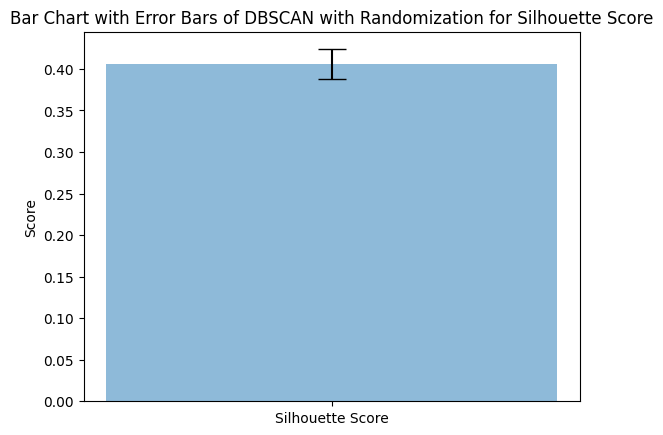

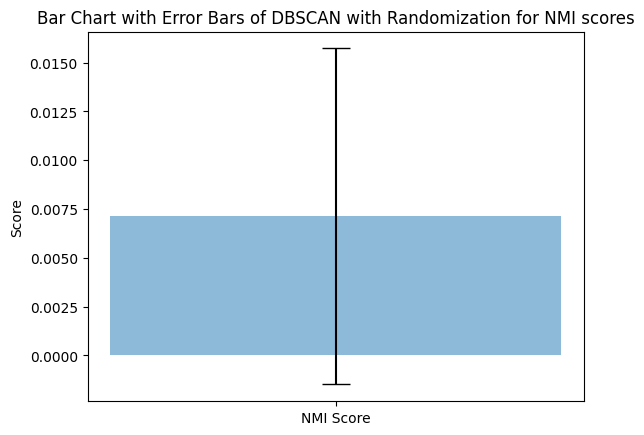

In [ ]:
fig, ax = plt.subplots()
x = ['Silhouette Score']
y = [mean_silhouette]
err = [std_silhouette]
ax.bar(x, y, yerr=err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Score')
ax.set_title('Bar Chart with Error Bars of DBSCAN with Randomization for Silhouette Score')
plt.show()

fig, ax = plt.subplots()
x = ['NMI Score']
y = [mean_nmi]
err = [std_nmi]
ax.bar(x, y, yerr=err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Score')
ax.set_title('Bar Chart with Error Bars of DBSCAN with Randomization for NMI scores')
plt.show()

### Implementation Correctness

For min_pts = 2 and and eps = 1.25

a) Created the scatterplot of the dataset with an integer on top of each point showing the order in which it was visited by the algorithm.

b) Denote with filled circles the core points and with empty circles the non-core points.

c) Used different colors for points belonging to different clusters as obtained by DBSCAN.

In [ ]:
df1 = pd.read_csv("implementation_correctness_dataset.csv")

In [ ]:
print('There are {} rows and {} columns in our dataset.'.format(df1.shape[0],df1.shape[1]))

There are 17 rows and 3 columns in our dataset.


In [ ]:
X1 = df1.drop('Class/Cluster',axis=1)
X1 = X1.to_numpy()

In [ ]:
#X1.to_numpy()
print(X1)

[[0.02       0.        ]
 [1.045      0.        ]
 [2.08       0.        ]
 [3.125      0.        ]
 [4.18       0.        ]
 [5.245      0.        ]
 [6.32       0.        ]
 [7.405      0.        ]
 [8.5        0.        ]
 [9.605      0.        ]
 [0.         1.005     ]
 [0.         2.04287094]
 [0.         3.15067663]
 [0.         4.36758347]
 [3.         1.62946271]
 [3.         2.26894388]
 [3.         2.92310397]]


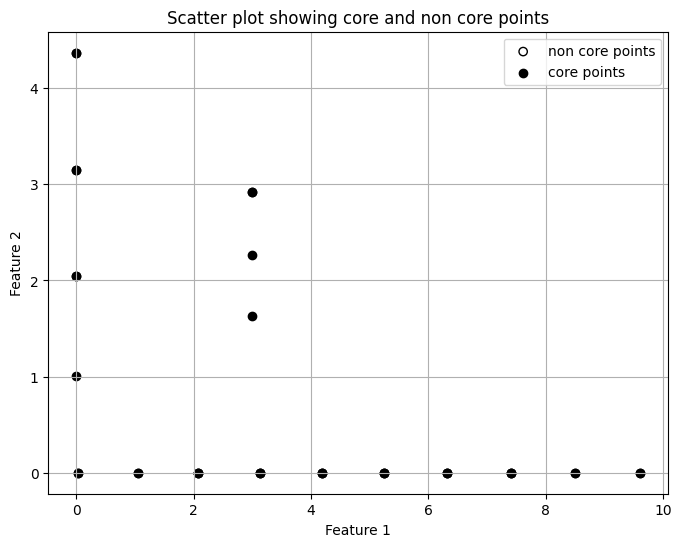

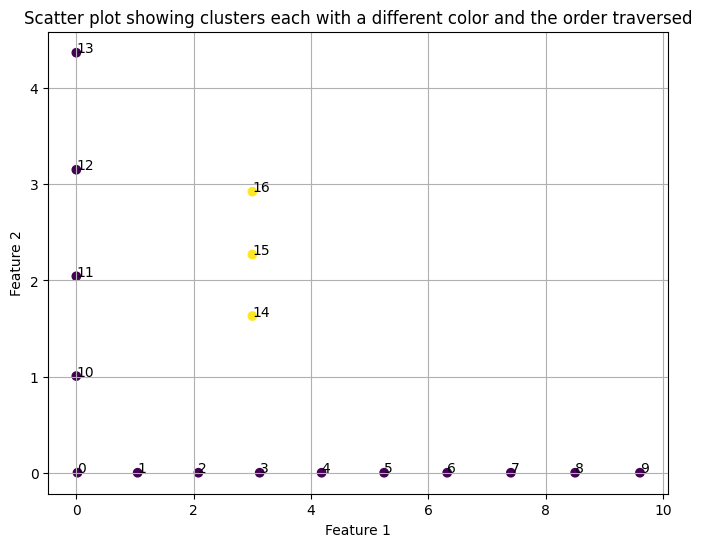

,DBSCAN_size
Cluster,
1.0,14
2.0,3


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dbscan = DBSCAN(eps=1.25, min_points=2)
labels,core_points, noncore_points, order = dbscan.fit_predict(X1)

# Separate the core and non-core points
core_X = X1[core_points]
non_core_X = X1[noncore_points]

# Plot the points with different colors based on the labels and markers based on core points
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(non_core_X[:, 0], non_core_X[:, 1], c="None", edgecolor = "black", label = "non core points")
ax.scatter(core_X[:, 0], core_X[:, 1], c= "black", marker='o', label = "core points")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Scatter plot showing core and non core points')
plt.legend()
plt.grid()
plt.show()

# create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Scatter plot showing clusters each with a different color and the order traversed')
scatter = ax.scatter(X1[:, 0], X1[:, 1], c=labels, cmap='viridis')

# add integer labels indicating the order of points visited by the algorithm
order = np.arange(len(X1))
for i, txt in enumerate(order):
    ax.annotate(txt, (X1[i, 0], X1[i, 1]))

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.grid()
plt.show()

#Clusters Created
data = pd.DataFrame(X1)
data.loc[ : ,'Cluster'] = (labels) # append labels to points
DBSCAN_clust_sizes = data.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

